# Epymorph dev log: May 31, 2023

Author: Alexander Nez

as of git hash: 50645d5e6efc58ffc1443a81c308b185288cdbbe

Allows the enduser to select type of ipm and movement.

This notebook also creates a csv file with appropriate file name in scratch folder.

Reason why this notebook was created is to help us look at specfic states and event rates within those states. Help us grasp this large scale idea into a more readable format. 


Note: plotting the data does not work with pei ipm as of 06/13/2023

pei
Loading requirements:
[✓] IPM (sirh)
[✓] MM (pei)
[✓] Geo (pei)
[✓] Parameters (file:/Users/alexandernez/Desktop/Github/Epymorph/scratch/sirh_params.toml)

Running simulation:
• 2015-01-01 to 2015-05-31 (150 days)
• 6 geo nodes
|####################| 100% 
Runtime: 0.266s
Displaying chart: e0


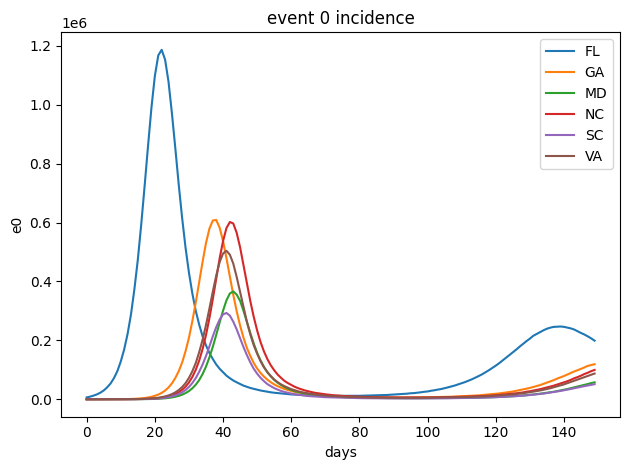

Writing output to file: ./scratch/output.csv
Done


In [21]:
import os

from epymorph.run import run

dir = os.path.expanduser('~/Desktop/Github/Epymorph/scratch')

ipm = str(input('please enter model pei, sdh or sirh:'))
if ipm == 'sdh':
    params = '/sdh_params.toml'
elif ipm == 'sirh':
    params = '/sirh_params.toml'
else:
    ipm = 'pei'
    params = '/sirh_params.toml'



mm = str(input('please enter movement model no, icecube, or pei:'))
if mm == 'no':
    mm = 'no'
elif mm == 'icecube':
    mm = 'icecube'
else:
    mm = 'pei'
print(mm)

exit_code = run(
    ipm_name = ipm,
    mm_name = mm,
    geo_name = 'pei',
    start_date_str = '2015-01-01',
    duration_str = '150d',
    params_path = dir + params,
    out_path = './scratch/output.csv',
    chart = 'e0',
    profiling=False
)

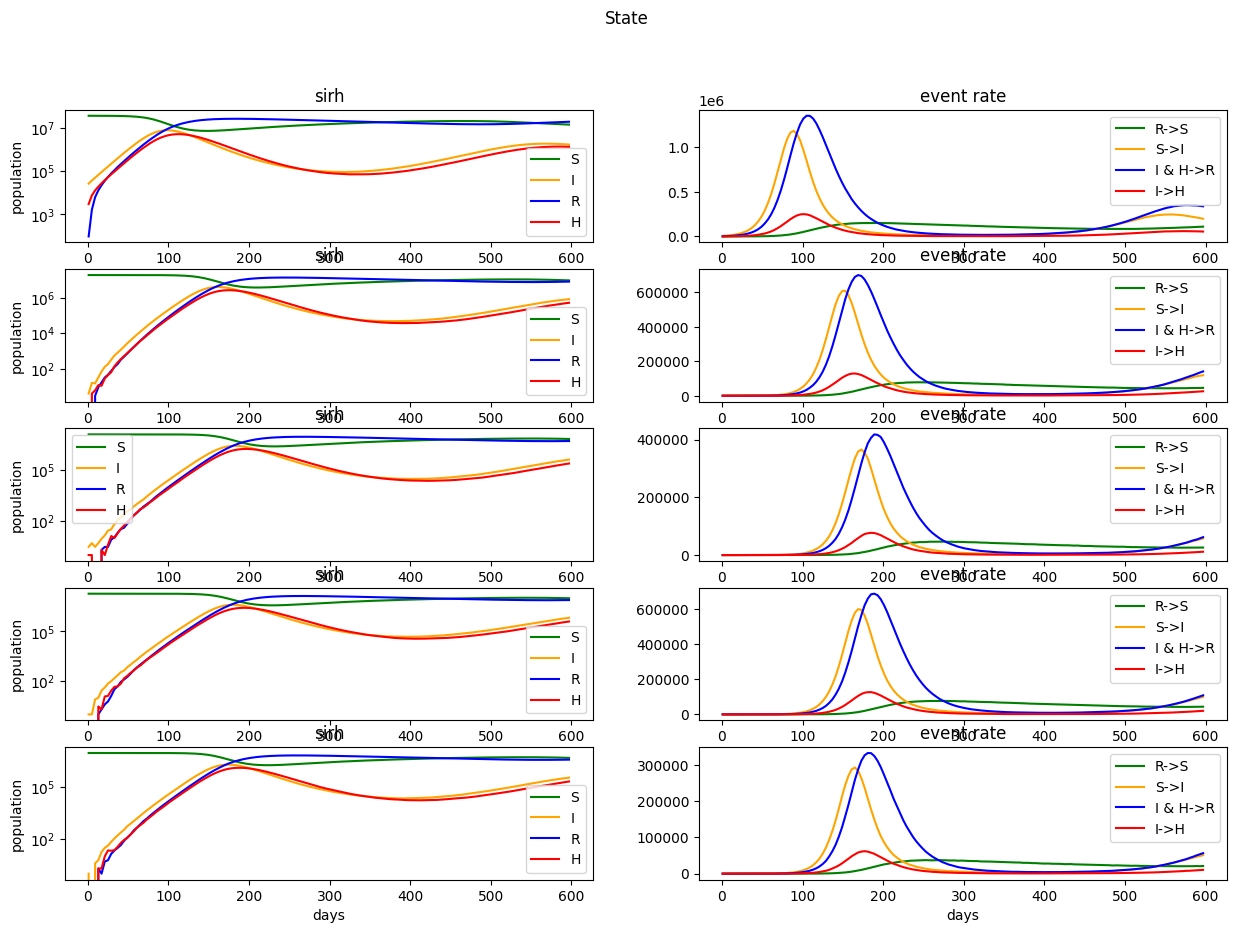

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

dir = os.path.expanduser('~/Desktop/Github/Epymorph/scratch')
header_names = ['days', 'State', 'S', 'I', 'R', 'H', 'S->I', 'I->R', 'I->H','H->R', 'R->S']
df = pd.read_csv(dir + '/output.csv', header= None, skiprows = 1, names = header_names)
df['I & H->R'] = df['I->R'] + df['H->R']

# Get current axis
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(15,10))

# variables for model
fig.suptitle('State')
sirh = ['S', 'I', 'R', 'H']
sirh_name = ['Susceptible', 'Infected', 'Recovered', 'hospitalized']
event_rate = ['R->S', 'S->I', 'I & H->R', 'I->H' ]
color = ['green', 'orange', 'blue', 'red']

# Plots sirh model

for j in range(5):      
    State = df.loc[df['State'] == j]
    Events = State[['days', 'State', 'S->I', 'I->R', 'I->H','H->R', 'R->S', 'I & H->R']]
    sirh_compartment = State[['days', 'State', 'S', 'I', 'R', 'H']]
    sirh_compartment = sirh_compartment.groupby(sirh_compartment['days'] // 2, sort=False).sum()
    Events = Events.groupby(Events['days'] // 2, sort=False).sum()
    for i in range(4):
        sirh_compartment.plot(kind='line',
            x='days',
            y= sirh[i],
            ylabel="population", 
            logy=True,
            color=color[i], 
            ax=axes[j,0],
            title = ipm)
        Events.plot(kind='line', 
            x='days',
            y=event_rate[i],
            color=color[i], 
            ax=axes[j,1],
            title = 'event rate')        
 
# show the plot
plt.show()